## test cuda available

In [1]:

import torch
print('torch version:', torch.__version__)
print('cuda version:', torch.version.cuda)
if torch.cuda.is_available():
    print('cuda available')
else:
    print('cuda unavailable')
print('muti device count:', torch.cuda.device_count())

torch version: 2.1.2+cu118
cuda version: 11.8
cuda available
muti device count: 4


In [6]:
import torch
input = torch.tensor([[1, 2], [3, 4], [5, 6]])
index = torch.tensor([[0, 1], [1, 2]])
# (0->1,0)(0->1,1) , (1->1,0)(1->2,1)
output = torch.gather(input, dim=0, index=index)
print(output)

index = torch.tensor([[0, 1, 1], [1, 0, 0], [1, 1, 0]])
# (0,0)(0,1)(0,1) , (1,0->1)(1,1->0)(1,1->0) , (2,0->1)(2,1->1)（2，2->0)
output = torch.gather(input, dim=1, index=index)
print(output)

tensor([[1, 4],
        [3, 6]])
tensor([[1, 2, 2],
        [4, 3, 3],
        [6, 6, 5]])


In [8]:
def extract(v, t, x_shape):
    """
    Extract some coefficients at specified timesteps, then reshape to
    [batch_size, 1, 1, 1, 1, ...] for broadcasting purposes.
    """
    device = t.device
    out = torch.gather(v, index=t, dim=0).float().to(device)
    print([t.shape[0]] + [1] * (len(x_shape) - 1))
    return out.view([t.shape[0]] + [1] * (len(x_shape) - 1))


v = torch.tensor([1, 2, 3, 4, 5])
t = torch.tensor([0, 2, 4])
out = extract(v, t, x_shape=(len(t),))
print(out.shape)
print(out)

[3]
torch.Size([3])
tensor([1., 3., 5.])


In [9]:
import torch.nn.functional as F
import torch

alphas_bar = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5])
T = 3

alphas_bar_prev = F.pad(alphas_bar, [1, 0], value=1)[:T]

print(alphas_bar_prev.shape)
print(alphas_bar_prev)

torch.Size([3])
tensor([1.0000, 0.1000, 0.2000])


In [11]:
import torch

n_T = 10
batch_size = 4
_ts = torch.randint(1, n_T + 1, (batch_size,))
print('_ts.shape:', _ts.shape)

beta2 = 0.02
beta1 = 1e-4
beta_t = (beta2 - beta1) * torch.arange(0, n_T +
                                        1, dtype=torch.float32) / n_T + beta1
sqrt_beta_t = torch.sqrt(beta_t)
alpha_t = 1 - beta_t
log_alpha_t = torch.log(alpha_t)
alphabar_t = torch.cumsum(log_alpha_t, dim=0).exp()
sqrtab = torch.sqrt(alphabar_t)
oneover_sqrta = 1 / torch.sqrt(alpha_t)
sqrtmab = torch.sqrt(1 - alphabar_t)
mab_over_sqrtmab_inv = (1 - alpha_t) / sqrtmab
print('beta_t.shape', beta_t.shape)

x = torch.randn((batch_size, 3, 32, 32))
eps = torch.randn_like(x)
print('x.shape:', x.shape)
print('eps.shape:', eps.shape)
print('sqrtab_extract.shape', sqrtab[_ts, None, None, None].shape)
x_t = (
    sqrtab[_ts, None, None, None] * x
    + sqrtmab[_ts, None, None, None] * eps
)
print('x_t.shape', x_t.shape)

simple_i = 5
# repeat(*sizes)函数可以将一个张量在指定的维度上重复多次
_ti = torch.tensor(simple_i/n_T).repeat(batch_size, 1)
print('_ti.shape:', _ti.shape, '\n_ti:', _ti)

_ts.shape: torch.Size([4])
beta_t.shape torch.Size([11])
x.shape: torch.Size([4, 3, 32, 32])
eps.shape: torch.Size([4, 3, 32, 32])
sqrtab_extract.shape torch.Size([4, 1, 1, 1])
x_t.shape torch.Size([4, 3, 32, 32])
_ti.shape: torch.Size([4, 1]) 
_ti: tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])


trans_data= {0.0: [[0, 0.0], [600, 0.3273999999999999], [1000, 0.383], [1600, 0.4768], [3000, 0.484], [4000, 0.4841], [5000, 0.4978], [6000, 0.506]], 0.4: [[0, 0.0], [600, 0.2779999999999999], [1000, 0.30599999999999994], [1600, 0.42490000000000006], [3000, 0.471], [4000, 0.46619999999999995], [5000, 0.46229999999999993], [6000, 0.4881]], 0.8: [[0, 0.0], [600, 0.21589999999999998], [1000, 0.2618999999999999], [1600, 0.40859999999999996], [3000, 0.4261999999999999], [4000, 0.41100000000000003], [5000, 0.4282], [6000, 0.43710000000000004]], 1.0: [[0, 0.0], [600, 0.13049999999999995], [1000, 0.1955], [1600, 0.34010000000000007], [3000, 0.37049999999999994], [4000, 0.3943], [5000, 0.394], [6000, 0.41590000000000005]]}
datasizes: [0.0, 600.0, 1000.0, 1600.0, 3000.0, 4000.0, 5000.0, 6000.0, 0.0, 600.0, 1000.0, 1600.0, 3000.0, 4000.0, 5000.0, 6000.0, 0.0, 600.0, 1000.0, 1600.0, 3000.0, 4000.0, 5000.0, 6000.0, 0.0, 600.0, 1000.0, 1600.0, 3000.0, 4000.0, 5000.0, 6000.0]
emds: [0.0, 0.0, 0.0, 0.

/tmp/ipykernel_16974/2182133015.py:111: RuntimeWarning: divide by zero encountered in power
  ret = k6 * (emd - k1*np.exp(-k2*np.power(k3*ds, k7*emd)))


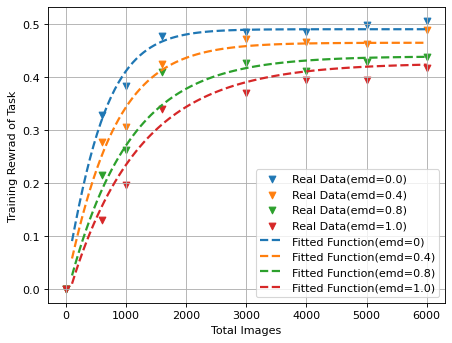

In [17]:

# python -m pytorch_fid extra/fed_emd/2024-05-09-00:19:50/emd/dst extra/fed_emd/2024-05-09-00:19:50/emd/src --device=cuda:2
# python -m pytorch_fid extra/fed_emd/2024-05-09-01:45:48/emd/dst extra/fed_emd/2024-05-09-01:45:48/emd/src --device=cuda:2
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
emd_data = {
    0: [
        [0, 100],
        [2, 100],
        [4, 100],
        [5, 100],
    ],
    600: [
        [0, 67.26],  # 61.66
        [2, 72.2],  # 72.93
        [4, 78.41],  # 72.95
        [5, 86.95],  # 74.05
    ],
    1000: [
        [0, 61.70],
        [2, 69.40],
        [4, 73.81],
        [5, 80.45],  # 73.45 trick
    ],
    1600: [
        [0, 52.32],
        [2, 57.51],  # 61.94
        [4, 59.14],
        [5, 65.99],  # 59.33 trick
    ],
    # 2000:[
    #     [0, 52.78],
    #     [2, 57.36],
    #     [4, 59.02], # 63.91
    #     [5, 56.53], # 56.81
    # ],
    3000: [
        [0, 51.60],  # 49.91
        [2, 52.90],  # 59.8
        [4, 57.38],  # 54.20
        [5, 62.95],  # trick
    ],
    4000: [
        [0, 51.59],  # todo
        [2, 53.38],  # trick
        [4, 58.90],
        [5, 60.57],
    ],
    5000: [
        [0, 50.22],
        [2, 53.77],
        [4, 57.18],
        [5, 60.6],
    ],
    6000: [
        [0, 49.40],
        [2, 51.19],
        [4, 56.29],
        [5, 58.41],
    ],
}

trans_data = {}
total_images = [k for k in emd_data.keys()]
for i in range(len(emd_data[total_images[0]])):
    emd = emd_data[total_images[0]][i][0] * 0.2
    # print("emd:",emd)
    trans_data[emd] = []
    for total_image in total_images:
        trans_data[emd].append(
            [total_image, 1-0.01*emd_data[total_image][i][1]])
print("trans_data=", trans_data)

# 使用plt绘制trans_data的点图并使用曲线拟合,x轴为数据量,y轴为fid,不同曲线代表不同emd
plt.xlabel('Total Images')
plt.ylabel('Training Rewrad of Task')
# plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi'] = 80
plt.grid(True)

for emd in trans_data.keys():
    trans_data[emd] = np.array(trans_data[emd])
    plt.scatter(trans_data[emd][:, 0], trans_data[emd][:, 1],
             label=f"Real Data(emd={emd})", marker='v')
    plt.legend()


# 编写函数拟合曲线，fid与数据量datasize和emd的关系
datasizes = []
emds = []
fids = []
for emd in trans_data.keys():
    for item in trans_data[emd]:
        emds.append(emd)
        datasizes.append(item[0])
        fids.append(item[1])
print("datasizes:", datasizes)
print("emds:", emds)
print("fids:", fids)


def fit_model(inputs, k1, k2, k3, k4, k5, k6, k7):
    row_emd = np.array(inputs[:, 0])
    ds = np.array(inputs[:, 1])
    # emd = k4 * np.exp(-((row_emd+k5)/k6)**2)
    emd = k4 * row_emd + k5
    # print("emd:",emd,"row_emd:",row_emd)
    # ret =  k1 + k2 * np.exp(-( k3 * np.power(k4 *(ds-k5), k6*emd+k7))) + k8 * emd
    # ret = k1 * np.exp(-k2*(  k3*ds - k3*emd +k5)) + k6
    ret = k6 * (emd - k1*np.exp(-k2*np.power(k3*ds, k7*emd)))
    return ret


emds = np.array(emds)  # (,m)
datasizes = np.array(datasizes)  # (,m)
inputs = np.vstack((emds, datasizes)).T
# print("input.shape=",inputs.shape)
outputs = np.array(fids)
# print("output.shape=",outputs.shape)
init_val = [
    1.04862905,  # k1
    0.00754393,  # k2
    0.12757985,  # k3
    -0.14609729,  # k4
    1.12451824,  # k5
    0.4354343,  # k6
    1,  # k7
]
popt, pcov = curve_fit(fit_model, inputs, outputs, p0=init_val, maxfev=500000)
print("popt:", popt)
# popt: [1.04862905 0.00855756 0.11129809 1.13285469 0.36742541 3.52175285 0.43404247]
emds = [0, 0.4, 0.8, 1.0]
for emd in emds:
    datasizes = np.linspace(100, 6000, 100)
    inputs = np.vstack((np.array([emd]*len(datasizes)), datasizes)).T
    plt.plot(datasizes, fit_model(inputs, *popt),
            "--", linewidth=2,label=f"Fitted Function(emd={emd})")
    plt.legend()